### Import des librairies utiles

In [2]:
import numpy as np
import pandas as pd

### Construction du dataset

#### La méthode consiste à pour chaque sujet mapper leurs ECG contenu dans 'label' avec l'activité associé

In [6]:
#Lecture et chargement du fichier pkl
s1 = pd.read_pickle('data/S1/S1.pkl')

In [9]:
labels = s1['label']

In [10]:
#Observation contenue de label
labels

array([49.61136908, 50.32399248, 52.70833578, ..., 84.004991  ,
       85.79625673, 87.4113988 ])

In [11]:
labels = pd.DataFrame(labels)
labels.shape

In [18]:
# Pour le sujet en question on prend le fichier associant à chaque temps l'acivité réalisé
activity = pd.read_csv('data/S1/S1_activity.csv')

In [46]:
activity.columns

Index(['# SUBJECT_ID', ' S1'], dtype='object')

In [38]:
activity_temp = activity.copy()

In [40]:
#On divise par deux les temps pour faire correspondre 'labels' avec chaque activités
for i in range(1, len(activity_temp)):
    activity_temp.set_value(i,' S1', activity[' S1'][i]/2)
activity_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [76]:
# On creer une liste contenant l'activité toutes les deux secondes
l = len(activity_temp[' S1'])
act = []
for j in range(0, l-1):
    for i in range(activity_temp[' S1'][j],activity_temp[' S1'][j+1]):
        act.append(activity_temp['# SUBJECT_ID'][j])

In [49]:
len(act)

4599

In [58]:
len(labels)

4600

In [60]:
# On supprime les dernieres ligne pour avoir la meme taille des deux cotés
labels = labels.drop([4599])

In [61]:
# On ajoute la colonne activité au dataset
labels['activités'] = act

In [63]:
labels.head()

,0,activités
0,49.611369,# NO_ACTIVITY
1,50.323992,# NO_ACTIVITY
2,52.708336,# NO_ACTIVITY
3,55.640794,# NO_ACTIVITY
4,57.658406,# NO_ACTIVITY


### Ajout des varaibles âge, skin, sport et IMC (WEIGHT/HEIGHT²)

In [78]:
subject = pd.read_csv('data/S1/S1_quest.csv')

In [82]:
subject

,# SUBJECT_ID,S1
0,# AGE,34
1,# GENDER,m
2,# HEIGHT,182
3,# WEIGHT,78
4,# SKIN,3
5,# SPORT,6


In [96]:
int(subject[' S1'][3])/((int(subject[' S1'][2]))*0.01)**2

23.54788069073783

In [97]:
l = len(labels)
age = int(subject[' S1'][0])
imc = int(subject[' S1'][3])/((int(subject[' S1'][2]))*0.01)**2
skin = int(subject[' S1'][4])
sport = int(subject[' S1'][5])
ages = []
imcs = []
skins = []
sports = []
for j in range(0, l):
    ages.append(age)
    imcs.append(imc)
    skins.append(skin)
    sports.append(sport)
    

In [98]:
labels['age'] = ages
labels['imc'] = imcs
labels['skin'] = skins
labels['sport'] = sports
labels

,0,activités,age,imc,skin,sport
0,49.611369,# NO_ACTIVITY,34,23.547881,3,6
1,50.323992,# NO_ACTIVITY,34,23.547881,3,6
2,52.708336,# NO_ACTIVITY,34,23.547881,3,6
3,55.640794,# NO_ACTIVITY,34,23.547881,3,6
4,57.658406,# NO_ACTIVITY,34,23.547881,3,6
5,58.911550,# NO_ACTIVITY,34,23.547881,3,6
6,57.976459,# NO_ACTIVITY,34,23.547881,3,6
7,58.676292,# NO_ACTIVITY,34,23.547881,3,6
8,62.350800,# NO_ACTIVITY,34,23.547881,3,6
9,69.113975,# NO_ACTIVITY,34,23.547881,3,6


### Création du dataset de train

In [105]:
# Fonction recréant pour chaque Sujet les étapes précedentes
def create_dataset(SX):
    sx = pd.read_pickle('data/'+ SX +'/' + SX +'.pkl')
    labels = sx['label']
    labels = pd.DataFrame(labels)
    activity = pd.read_csv('data/' + SX + '/' + SX + '_activity.csv')
    activity_temp = activity.copy()
    for i in range(1, len(activity_temp)):
        activity_temp.set_value(i,' '+ SX, activity[' '+ SX][i]/2)
    l = len(activity_temp[' '+ SX])
    act = []
    for j in range(0, l-1):
        for i in range(activity_temp[' '+ SX][j],activity_temp[' '+ SX][j+1]):
            act.append(activity_temp['# SUBJECT_ID'][j])
    for i in range(len(act), len(labels)):
        labels = labels.drop([i])
    labels['activités'] = act
    subject = pd.read_csv('data/'+ SX +'/' + SX +'_quest.csv')
    l = len(labels)
    age = int(subject[' '+ SX][0])
    imc = int(subject[' '+ SX][3])/((int(subject[' '+ SX][2]))*0.01)**2
    skin = int(subject[' '+ SX][4])
    sport = int(subject[' '+ SX][5])
    ages = []
    imcs = []
    skins = []
    sports = []
    for j in range(0, l):
        ages.append(age)
        imcs.append(imc)
        skins.append(skin)
        sports.append(sport)
    labels['age'] = ages
    labels['imc'] = imcs
    labels['skin'] = skins
    labels['sport'] = sports
    return labels

In [110]:
S1  = create_dataset('S1')
S2  = create_dataset('S2')
S3  = create_dataset('S3')
S4  = create_dataset('S4')
S5  = create_dataset('S5')
S7  = create_dataset('S7')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and w

In [111]:
frames = [S1, S2, S3, S4, S5, S7]
train = pd.concat(frames)

In [112]:
train

,0,activités,age,imc,skin,sport
0,49.611369,# NO_ACTIVITY,34,23.547881,3,6
1,50.323992,# NO_ACTIVITY,34,23.547881,3,6
2,52.708336,# NO_ACTIVITY,34,23.547881,3,6
3,55.640794,# NO_ACTIVITY,34,23.547881,3,6
4,57.658406,# NO_ACTIVITY,34,23.547881,3,6
5,58.911550,# NO_ACTIVITY,34,23.547881,3,6
6,57.976459,# NO_ACTIVITY,34,23.547881,3,6
7,58.676292,# NO_ACTIVITY,34,23.547881,3,6
8,62.350800,# NO_ACTIVITY,34,23.547881,3,6
9,69.113975,# NO_ACTIVITY,34,23.547881,3,6


## Modèle de Classification

In [119]:
Y_train = train['activités']
X_train = train.drop(columns='activités')

### GBM

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01}
gbc_model = GradientBoostingClassifier(**params)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [122]:
gbc_model.score(X_train, Y_train)

0.5414576132604898

In [123]:
S8 = create_dataset('S8')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [129]:
x_test = S8.drop(columns='activités')
y_test = S8['activités']

In [127]:
y_predict = gbc_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


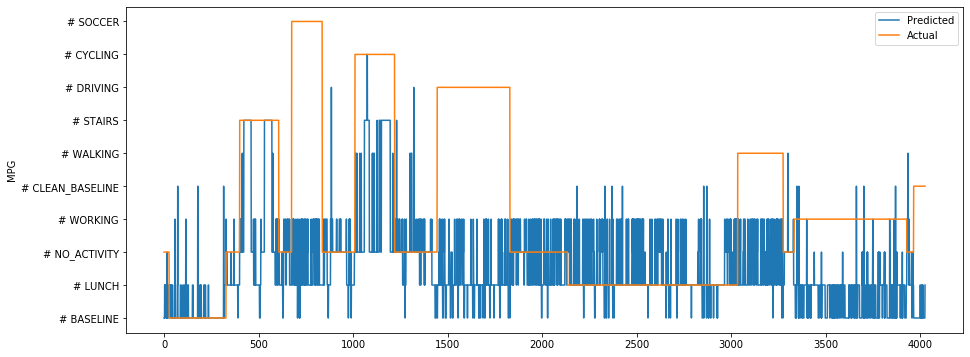

In [130]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')

plt.legend()
plt.show()

In [131]:
r_square = gbc_model.score(x_test, y_test)
r_square

0.34243853985597217

#### Grid Search

In [132]:
from sklearn.model_selection import GridSearchCV

num_estimators = [100, 200, 500]
learn_rates = [0.01, 0.02, 0.05, 0.1]
max_depths = [4, 6, 8]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths}

grid_search = GridSearchCV(GradientBoostingClassifier(min_samples_split=2),
                           param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}

In [133]:
params = {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
gbc_model = GradientBoostingClassifier(**params)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [134]:
gbc_model.score(X_train, Y_train)

0.464265804437507

In [135]:
y_predict = gbc_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


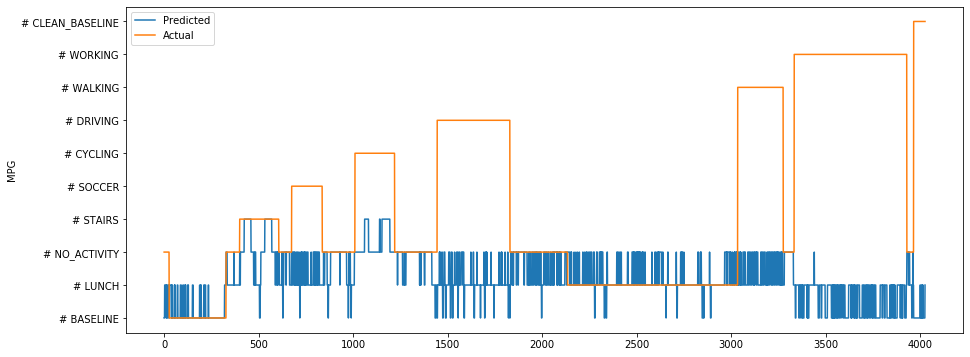

In [136]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')

plt.legend()
plt.show()

In [137]:
r_square = gbc_model.score(x_test, y_test)
r_square

0.38564688353613114

### Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(max_depth=20, random_state=0)
rfc_model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [141]:
rfc_model.score(X_train, Y_train)

0.8315308284089642

In [142]:
y_predict = rfc_model.predict(x_test)

In [143]:
rfc_model.score(x_test, y_test)

0.2602433573379687

Populating the interactive namespace from numpy and matplotlib


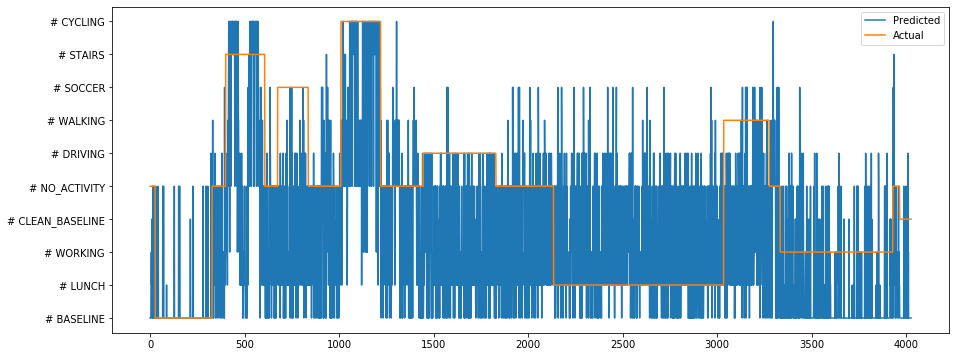

In [145]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.legend()
plt.show()